<div align="right"><img src='z-logo-default.svg'/>

<h3 style="color:#900C3F;font:luminary;"><i>Single Family Residence price predictions - Nov, 21 2022</i></h1>

#### *Analyzing the data from zillow data base.*
##### 2017, Single Family Residence @Los Angeles, Ventura and Orange counties

<h1 style="color:#900C3F;">Projet's Goal</h1> 

- __Build the *Regression model* that going to predict Single Family Residence prices better than a baseline model.__

<h2 style="color:#900C3F;">Projet's Plan</h1> 

#### Aqcuire and prepare
1. Acquire the data from the ```zillow``` database. Transform the data to a Pandas data frame to make it easy to use and manipulate in the Jupyter Notebook.
2. Prepare the data for exploration and analysis. Find out if there are some values missing and find a way to handle those missing values.
3. Change data types if needed
4. Find if there are features that can be created to simplify the exploration process.
5. Handle the outliers.
6. Create a data dictionary.
7. Split the data into 3 data sets: train, validate and test data (56%, 24%, and 20% respectively)

#### Explore and pre-process
1. Explore the train data set through visualizations and statistical tests. 
2. Find which features that have an impact on the houses prices. 
2. Make the exploration summary and document the main takeaways.
3. Impute the missing values if needed.
4. Pick the features that can help to build a good predicting model.
5. Identify if new features have to be created.
6. Encode the categorical variables
7. Split the target variable from data sets.
8. Create scaled data sets for the modeling.

#### Build a regression model
1. Pick the regressor algorithms for creating the predicting model.
2. Create the models and evaluate regressors using the **RMSE** and **Adjasted $R^2$** scores on the train data sets.
3. Pick three best performing models based on the RMSE score and evaluate them on the validation set.
4. Find out which model has the best performance: relatively high predicting power on the validation test and slight difference in the train and validation prediction results.
5. Apply the predictions to the test data set.
6. Evaluate the results.

*Drow conclusions*

<h3 style="color:#900C3F;">Imports</h1> 

In [4]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import python modules
import wrangle as wr
import explore as ex
import modeling as md
import model_ventura as mv

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from importlib import reload

# set graphs background
sns.set(rc={'figure.facecolor':'fbf3e4','axes.facecolor':'fbf3e4'})

# display float numbers in human readable format
pd.options.display.float_format = '{:,.3f}'.format

<h3 style="color:#900C3F;">Acquire the data</h1> 

- Data is acquired from the ```zillow``` database on November, 15 2022.
- To make it run on your computer you need to add your own env.py file into the repository. This file gives you access to the database.
- The initial data consists of 52441 rows and 8 columns
- Each observation represents a listing on the zillow site.
- Each column represents the information connected with that listing.
- Data includes only the information about Single Family Residencies from Los Angeles, Ventura, Orange counties in California, USA.
- Data includes only the transactions that were made in 2017.

<h3 style="color:#900C3F;">Data preparation steps</h1> 

In the ```SQL query``` were included: squared footage of the house, squared footage of the lot, number of bathrooms, number of bedrooms, number of pools, the year the house was build, the area ```fips``` code and the tax value of the house which represents the price.

**Steps to make the data more readable:**
- Renamed the columns
- Area codes were replaced by ```county_names```
- Created a new column ```house_age``` which is equal to the ```year_built``` subtracted from ```2017```

**Steps to clean the data:**
- Removed duplicates
- Removed some of outliers:
    * ```sq_feet```: outliers below the 0.99 quantile and minimum ```sq_feet = 300``` 
    * maximum ```bedrooms = 6```
    * maximum ```bathrooms = 6```
    * data where ```bedrooms``` and ```bathrooms``` are equal to 0
    * half ```bathrooms``` were removed
    * price (```home_value```) below $\$$ 2,000,000 USD

**Steps to prepare the data for the exploration**
- dropped duplicates
- replaced the ```null``` values in ```pools``` with ```0```
- splitted the data into 3 data sets: ```train```, ```validate```, ```test``` (56%, 24%, and 20% respectively)

**Final results**
- After the cleaning the data set contains 50,157 rows and 9 columns.
- Approx. 4.36% of the data was removed from the original data set.

**Outliers note**

It was impossible to remove all outliers. It would decrease the data size dramatically. Two columns ```lot_sqft``` and ```home_value``` still contain lots of outliers and ```home_value``` contains some not realistic data(like home price being $1000). This fact might negatively affect the model's performance.

In [34]:
# get train, validate and test data sets of clean data prepared for the exploration
train, validate, test = wr.split_zillow(wr.get_zillow())

## Data Dictionary


| Feature | Definition | Manipulations applied|Data Type|
|:--------|:-----------|:-----------|:-----------|
|<img width=50/>|<img width=200/>|<img width=50/>|<img width=100/>|
|||**Categorical Data**
|<img width=50/>|<img width=200/>|<img width=50/>|<img width=100/>|
|*county_name*| Names of the counties in the data set  | canged fips code into county names:'LA', 'Orange', 'Ventura'| category
|||**Numerical Data**
|<img width=50/>|<img width=100/>|<img width=50/>|<img width=150/>|
|*bedrooms*|  Number of bedrooms | Changed the type into integer| integer
|*bathrooms*|  Number of bathrooms | Half-bathrooms were turned into whole number, changed the type intoto integer| integer
|*sq_feet*| Squared feet of the house | Changed the type into integer| integer
|*lot_sqft*| Squared feet of the land | Changed the type into integer| integer
|*year_built*| Year the house was built | Changed the type into integer| integer
|*house_age*| Age of the house | Created the column by subtracting the year_built from 2017| integer
|*pools*| Number of pools | Replaced the null values with 0| integer
|**Target Data**
||<img width=150/>|<img width=550/>|
|**home_value** | **The Single Family Residence price** || **float**

<h3 style="color:#900C3F;">Data exploration</h1> 

- In the exploration part of the project I look for the correlations between the target(price,```home_value```) and other variables.
- I try to find out if the location affects the price. 
- I look for the variables that can negatively affect the model performance.
- I run statistical tests to confirm some findings.

### 1. What is the price distribution in the data set?

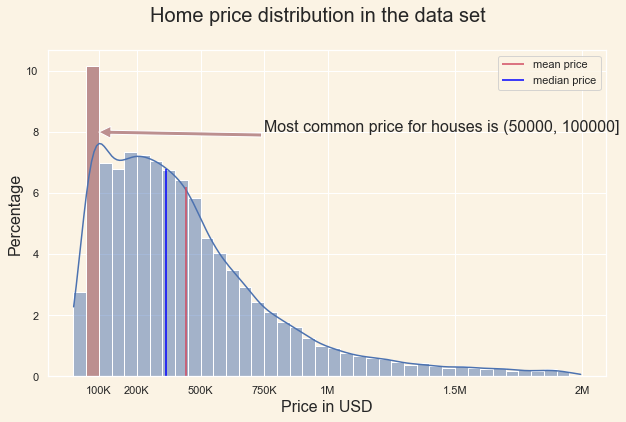

In [35]:
# display a distribution of the prices in the data set
ex.price_distribution(train)

We can clearly see that even after removing possible outliers our data still looks not normally distributed. The difference between mean and median is over $80K. This is the main reason why as a baseline I'm going to use a **median** value.

### 2. Do the home prices vary in three different counties?

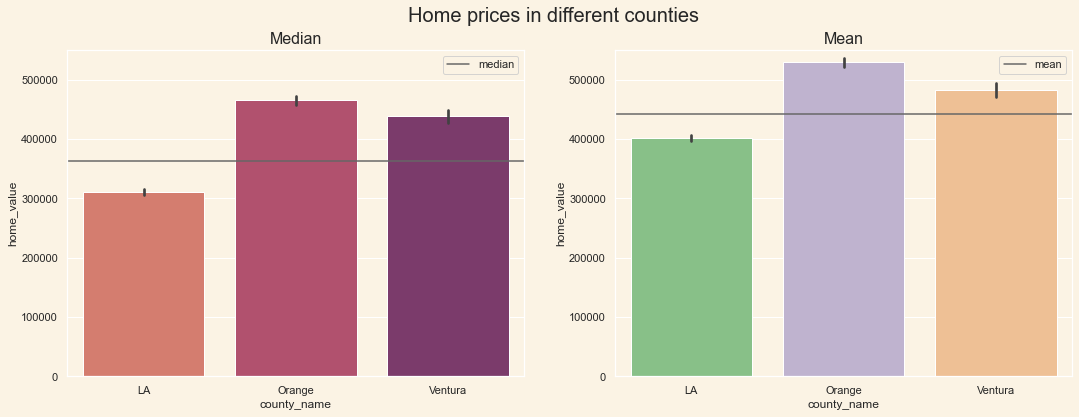

In [7]:
# display home prices in counties viz
ex.counties_viz(train)

We can observe that most expensive properties are located in Orange county. The properties  prices in Los Angeles county are below both median and mean. To confirm that the price variation is significant I run the statistical test to compare means. Samples are big enough and independent but the have lots of ouliers and unequal variances. That's why I'm using *Kruskal-Wallis* test.

$H_0:$  There is no significant difference between ```home_value``` in different ```county_name``` counties.

$H_a:$  There is a significant difference between ```home_value``` in different  ```county_name``` counties.

In [8]:
# run kruskall-wallis stat test
ex.counties_test(train)

Variances are different. Use an non-parametric Kruskal-Wallis test.

We reject the null hypothesis.
There is a significant difference in home prices in different counties.


### 3. Do houses with pools cost more than the houses without pool?

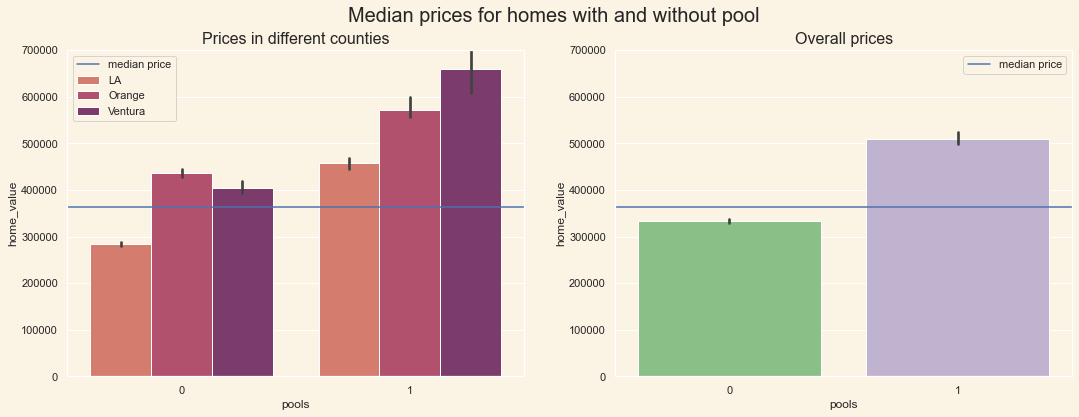

In [36]:
# display prices for homes with pools viz
ex.pools_viz(train)

Both graphs show the median prices of houses with or without pool.
- Houses *with* pools are more expensive. Most of them have a price above the median.
- The most expensive houses *without* pools are in the Orange county (vs. overall more expensive houses in Ventura county)

### 4. Is there a correlation between a square feet of the house and its price?

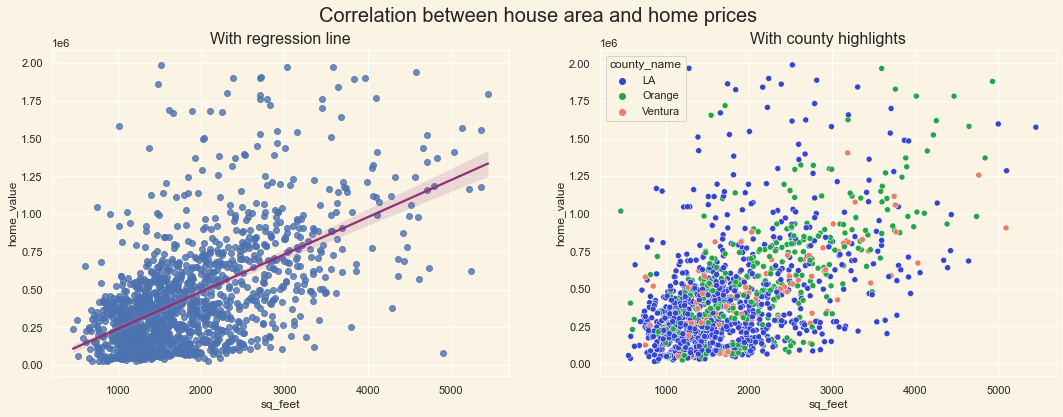

In [10]:
# sq_feet vs price viz
ex.sqft_price_viz(train)

In Ventura county we can observe a strong positive correlation between the square fooatge of the house and its price. When it comes to LA and Orange county the data is more spread. The left graph shows us that both variables are correlated but I guees it needs to be confirmed with the statistical test.

$H_0:$  There is no linear correlation between ```home_value``` and ```sq_feet```

$H_a:$  There is a linear correlation between ```home_value``` and ```sq_feet```

*Assumptions to be met:*
- Linear
- Independent 
- Normal
- Equal variances - fail
- Random

We don't have equal variances and there are outliers in both ```sq_feet``` and ```home_values``` columns. To check if there is a correlation between square footage and home price I'll use **Spearman's rank correlation test**

In [37]:
# run spearman's rank corr test
ex.sqfeet_test(train)

We reject the null hypothesis.
There is a linear correlation between home price and its size(square feet)
The correlation coefficient is 0.5
LA       correlation coefficient is  0.42

Ventura  correlation coefficient is  0.66

Orange   correlation coefficient is  0.57



The test confirms the correlation and the coefficient is relatively strong and the strongest relationship between squared footage and county shows Ventura county.

### 5.  Are the new houses more valuable than the old ones?

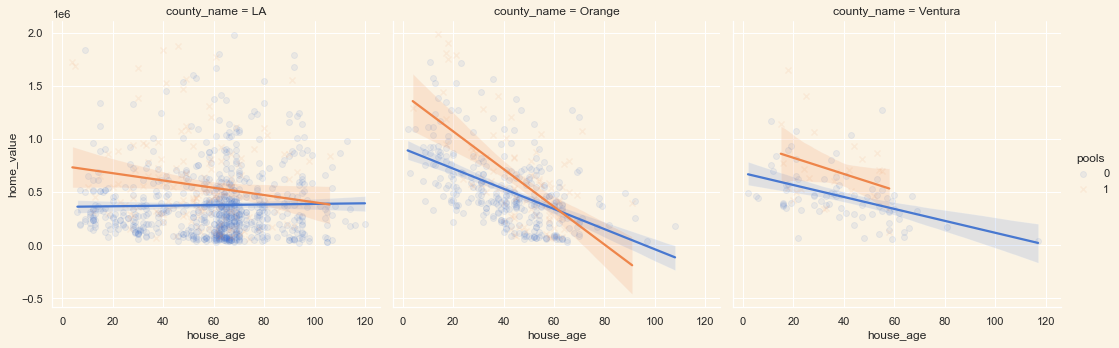

In [12]:
# hous_age vs price viz
ex.age_price_viz(train)
# blue line - pools, orange line - no pools

There are three graphs, each of them represents a county and highlights the properties with or without pools. LA county one more time differs from other counties. There is almost no relation between a price and home age in LA. While other counties show a strong negative correlation.

__Variance inflation factor__

At the very end of the exploration part of my project, I'd like to check variables for the multicollinearity. The goal is to exclude the features that are correlated with each other.

In [13]:
# get variance inflation factor test
ex.vif(train)

,features,VIF
4,year_built,34.764
5,house_age,8.634
2,sq_feet,3.819
1,bathrooms,3.061
0,bedrooms,1.828
7,home_value,1.517
6,pools,1.140
3,lot_sqft,1.003


No surprises in the VIF test, ```year_built``` is not suitable for the regression model as I've created a variable ```house_age``` based on it. ```house_age``` has as well correlations with ```sq_feet``` and the number of ```bathrooms``` but I leave it for my models.

### Exploration Takeaways
- The mean price is more than $\$$80K higher that the median price
- The most common house prices are between $\$$50K and $100
- There is a significant difference in the house prices among counties. Houses in Ventura have the highes price, while prices in Los Angeles are below the median.
- Houses *with* pools are more expensive. Most of them have a price above the median.
- The most expensive houses *without* pools are in the Orange county (vs. overall more expensive houses in Ventura county)
- There is a positive correlation between square footage and price.
- Ventura county has the relation beween price and house area and LA has the lowest one.
- There is no correlation between the house age and its price in LA county while other counties have a strong negative correlation.

Based on exploration I can conclude that it will be difficult to build a strong model. I didn't discover any strong relations with the price in LA county and I can suggest that the price predictions from LA county going to pull all the prediction results down. 

<h3 style="color:#900C3F;">Modeling</h1> 

### Data pre-processing

To prepare the data set for modeling it has to be:

- digitized: categorical data has to be represented with numbers (0's and 1's in most cases)
- split into a train, validate and test data sets, and train, validate and test target values.

**Features that I won't use to the create models**

|Feature|The reason|
|:------|:-------|
|<img width=150/>|<img width=450/>|
|*year_built*|correlated with ```house_age```


**Features that I will use to create the models**

All other features will go into the train, validate and test data sets. 


**How I create models**

I use six different regressors
- Single and Multiple Linear Regressions with default hyperparameters
- Generalized Linear Model (TweedieRegressor) with ```alpha=0.5``` and ```power=2```
- Lasso Lars algorithm with ```alpha=0.1```
- Gradient Boosting Regressor with default hyperparameters
- Decision Tree Regressor with ```max_depth=4```
- Random Forest Regressor with ```max_depth=4```

I have created manualy five different feature combinations, added 2 combinations with ```SelectKBest``` algorithm and added all columns in the last feature combination. In different iterations I used ```StandardScaler```,  ```QuantileTransformer```, ```PolynomialFeatures``` and I've made one iteration with ```RFE``` (recursive feature elimination). All tools used from the```sklearn``` library. Overall my code generated 155 different models.

### Data evaluation

__Root mean squared error__

To evaluate the performance of the regression models I'm going to use the **RMSE** score. 

First I select twenty models with the lowest **RMSE** score on the train set, then I look for five models that produced the lowest **RMSE** score on the validation set and finally I pick the best model with the minimum difference in the scores of both sets. 

As we remember, the data contains outliers. The difference betweence between the mean and median values is around $80K. That's why I decided to use median as my baseline model.

In [86]:
# run all models
# the results are stored in the md.scores data frame.
# this function writes an *.csv file with the scores
md.run_all_models()

In [91]:
# display top 5 models and save the best model to the variable
best_model = md.select_best_model(md.scores)

,model_name,features,scaling,RMSE_train,R2_train,RMSE_validate,R2_validate,RMSE_difference
128,Gradient Boosting Regression,f5_poly,standard,267871,0.420,268988,0.400,1117
146,Gradient Boosting Regression,f8_poly,standard,267400,0.420,269094,0.400,1694
92,Gradient Boosting Regression,f8,quantile,269976,0.410,269407,0.400,569
44,Gradient Boosting Regression,f8,standard,269976,0.410,269407,0.400,569
110,Gradient Boosting Regression,f2_poly,standard,270048,0.410,269736,0.400,312


In [92]:
# display the best model
best_model

,model_name,features,scaling,RMSE_train,R2_train,RMSE_validate,R2_validate,RMSE_difference
110,Gradient Boosting Regression,f2_poly,standard,270048,0.410,269736,0.400,312


The model that performed best is Gradient Boosting Regression. It used all possible features of the data set, but ```bedrooms``` and ```bathrooms``` went through the polynomial transformation with the ```degree=2```. 

In [93]:
md.run_best_model()

,Gradient Bosting Regression,Scores
0,Features,"['bedrooms', 'bathrooms']"
1,RMSE baseline,357599
2,RMSE Train Set,270048
3,RMSE Validation Set,269726
4,RMSE Test Set,273499
5,R2 Train Set,0.410
6,R2 Validation Set,0.400
7,R2 Test,0.380
8,Beats a basline by:,23.5%


The winning model performs quite good on the train and validation sets and unexpectedly looses some points with the test data set. Still the test data set beets a baseline by 23.5%

__Ventura county___

As I've mentioned in the end of the data exploration part, I guess the predictions of the model are going to be not so good because the data is spread and because LA county exploration results vary a lot from other counties. I decided to run the models I've created exclusively on the data from Ventura county and see if the results will be better.

In [95]:
mv.run_all_models()
mv.select_best_model(mv.scores)

,model_name,features,scaling,RMSE_train,R2_train,RMSE_validate,R2_validate,RMSE_difference
148,Random Forest Regression,f8_poly,standard,185889,0.590,200807,0.560,14918
44,Gradient Boosting Regression,f8,standard,170817,0.660,201279,0.560,30462
92,Gradient Boosting Regression,f8,quantile,170817,0.660,201297,0.560,30480
146,Gradient Boosting Regression,f8_poly,standard,162394,0.690,201492,0.560,39098
140,Gradient Boosting Regression,f7_poly,standard,169548,0.660,201681,0.560,32133


,model_name,features,scaling,RMSE_train,R2_train,RMSE_validate,R2_validate,RMSE_difference
148,Random Forest Regression,f8_poly,standard,185889,0.590,200807,0.560,14918


The best performing model for Ventura county is Random Forest Regressor with maximum depth set to 4.

In [100]:
mv.run_best_model()

,Random Forest Regression,Scores
0,Features,"['bedrooms', 'bathrooms', 'sq_feet', 'lot_sqft..."
1,RMSE baseline,316679
2,RMSE Train Set,185891
3,RMSE Validation Set,200845
4,RMSE Test Set,198664
5,R2 Train Set,0.590
6,R2 Validation Set,0.560
7,R2 Test,0.590
8,Beats a basline by:,37.3%


We can clearly see that RMSE score is much lower this time. The model for Ventura county performs 37.3% better than a baseline model.

#### Modeling summary

 #### Conclusions and the next steps
 - So far LA county shows very week relations between features and price. For the next modeling I would include more features in the data set and look for the variable in the data that has a strong correlation with the price in LA county.